# Analysis Starts here

importing our required libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

reading the csv data file

In [2]:
data = pd.read_csv("C:\\GIT\\Diwali-Sales-Analysis\\data\\Diwali Sales Data.csv", encoding = 'ISO-8859-1')

printing first 5 rows in our dataset

In [3]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


checking data types of our columns

In [4]:
data.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

printing the names of our columns

In [5]:
columns = data.columns
for i in columns:
    print(i)

User_ID
Cust_name
Product_ID
Gender
Age Group
Age
Marital_Status
State
Zone
Occupation
Product_Category
Orders
Amount
Status
unnamed1


finding the total number of rows and columns in our dataset

In [6]:
data.shape

(11251, 15)

gathering basic information about the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


dropping columns that are null

In [8]:
data.drop(["Status", "unnamed1"], axis = 1, inplace = True)

printing first 5 rows of the dataset

In [9]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


checking for null values again

In [10]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

again removing the 12 null entries from the amount column

In [11]:
data.dropna(inplace = True)

now we are checking if the dataset has any residual null values

In [12]:
data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [13]:
data.shape

(11239, 13)

exploring the data types of the pandas dataframe

In [14]:
data.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

changing amount dtype to int

In [15]:
data['Amount'] = data['Amount'].astype('int')

In [16]:
data['Amount'].dtypes

dtype('int32')

In [17]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [18]:
data[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


Starting Exploratory Data Analysis (EDA)

In [19]:
# Gender
gender_amount = data.groupby('Gender')['Amount'].sum().reset_index()
fig = px.bar(gender_amount,
             x = 'Gender',
             y = 'Amount',
             color_discrete_sequence=['#D659F1'],
             text = 'Amount')
fig.update_layout(title_text = 'Amount spent by Gender',
                  xaxis_title = 'Gender',
                  yaxis_title = 'Amount',
                  template = 'plotly_dark',
                  title_x = 0.5,
                  height = 500,
                  width = 1150)
fig.update_traces(textposition = 'outside')
fig.show()

In [22]:
gender = data['Gender'].value_counts()
gender

Gender
F    7832
M    3407
Name: count, dtype: int64

In [26]:
gender_counts = data['Gender'].value_counts().reset_index().rename(columns={'index': 'gender', 'gender': 'count'})

fig = px.bar(gender_counts,
             x = 'Gender',
             y = 'count',
             color_discrete_sequence=['#D659F1'],
             text = 'count',
             title='Gender Count',
             labels={'gender': 'Gender', 'count': 'Count'},
             template='plotly_dark',
             height=500,
             width=1150)
fig.update_traces(textposition = 'outside')
fig.show()

the count of female is higher than the male and thus females are spending more than the males.

In [29]:
#amount spent by females
female_spent = data[data['Gender'] == 'F']['Amount'].sum()
female_spent

74335853

In [30]:
#amount spent by males
male_spent = data[data['Gender'] == 'M']['Amount'].sum()
male_spent

31913276

In [31]:
#counting the number of females
female_count = data[data['Gender'] == 'F']['Amount'].count()
female_count

7832

In [32]:
#counting the number of males
male_count = data[data['Gender'] == 'M']['Amount'].count()
male_count

3407

In [33]:
#average spend by male and female
avg_spent = data.groupby('Gender')['Amount'].mean().reset_index()
avg_spent

,Gender,Amount
0,F,9491.298902
1,M,9366.972703


although female sent is way more than the male spent
the average amount spent by each male and female are very close and differ by only Rs.125 approximately


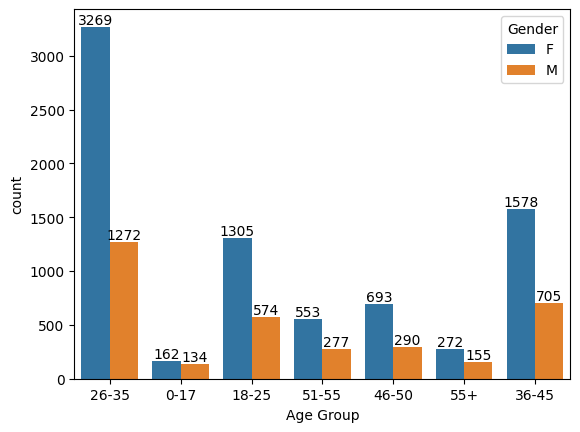

In [36]:
ax = sns.countplot(data, x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

In [39]:
counts = data.groupby(['Age Group', 'Gender']).size().reset_index(name='count')

# Create the countplot
fig = px.bar(counts,
             x='Age Group',
             y='count',
             color='Gender',
             title='Countplot of Age Group by Gender')
fig.update_layout(title_x=0.5,
                  height=500,
                  width=1150,
                  template='plotly_dark',
                  xaxis_title='Age Group',
                  yaxis_title='Count',
                  legend_title='Gender')
# Display the plot
fig.show()

Now we have a clear visualisation of the composition of each age group in our dataset.

### top 10 sum of orders by states

In [42]:
#finding top 10 sates with most orders in descending order
sales_state = data.groupby('State')['Orders'].sum().reset_index().sort_values(by = 'Orders', ascending = False).head(10)
fig = px.bar(sales_state, x = 'State', y = 'Orders', color_discrete_sequence = ['#D659F1'], text = 'Orders')
fig.update_layout(title_text = 'Number of Orders from each State', xaxis_title = 'State', yaxis_title = 'Number of Orders', template = 'plotly_dark', title_x = 0.5, height = 500, width = 1150)
fig.update_traces(textposition = 'outside')
fig.show()

In [43]:
#total amount from top 10 states
sales_state = data.groupby('State')['Amount'].sum().reset_index().sort_values(by = 'Amount', ascending = False).head(10)
fig = px.bar(sales_state, x = 'State', y = 'Amount', color_discrete_sequence = ['#D659F1'], text = 'Amount')
fig.update_layout(title_text = 'Total Amount from each State', xaxis_title = 'State', yaxis_title = 'Total Amount', template = 'plotly_dark', title_x = 0.5, height = 500, width = 1150)
fig.update_traces(textposition = 'outside')
fig.show()

In [50]:
# married =1 and unmarried = 0, amount spent by marital status by gender
marital_status = data.groupby(['Marital_Status', 'Gender'])['Amount'].sum().reset_index()
fig = px.bar(marital_status,
             x = 'Marital_Status',
             y = 'Amount',
             color = 'Gender',
             barmode = 'group',
             text = 'Amount')
fig.update_layout(title_text = 'Amount spent by Marital Status by Gender',
                  xaxis_title = 'Marital Status',
                  yaxis_title = 'Amount',
                  template = 'plotly_dark',
                  title_x = 0.5,
                  height = 500,
                  width = 1150)
fig.update_traces(textposition = 'outside')
fig.show()


In [51]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [55]:
#plottin the occupation by gender count and spent
occupation = data.groupby(['Occupation', 'Gender'])['Amount'].sum().reset_index().sort_values(by = 'Amount', ascending = False)
fig = px.bar(occupation,
             x = 'Occupation',
             y = 'Amount',
             color = 'Gender',
             barmode = 'group',
             text = 'Amount')
fig.update_layout(title_text = 'Amount spent by Occupation by Gender',
                  xaxis_title = 'Occupation',
                  yaxis_title = 'Amount',
                  template = 'plotly_dark',
                  title_x = 0.5,
                  height = 500,
                  width = 1150)
fig.update_traces(textposition = 'outside')
fig.show()


In [58]:
# what is the order distribution by occupation and gender

order_occupation = data.groupby(['Occupation', 'Gender'])['Orders'].sum().reset_index().sort_values(by = 'Orders', ascending = False)
fig = px.bar(order_occupation,
             x = 'Occupation',
             y = 'Orders',
             color = 'Gender',
             barmode = 'group',
             text = 'Orders')
fig.update_layout(title_text = 'Orders by Occupation by Gender',
                  xaxis_title = 'Occupation',
                  yaxis_title = 'Orders',
                  template = 'plotly_dark',
                  title_x = 0.5,
                  height = 500,
                  width = 1150)
fig.update_traces(textposition = 'outside')
fig.show()

In [60]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [61]:
# which product category was most popular by gender
product_gender = data.groupby(['Product_Category', 'Gender'])['Orders'].sum().reset_index().sort_values(by = 'Orders', ascending = False)
fig = px.bar(product_gender,
             x = 'Product_Category',
             y = 'Orders',
             color = 'Gender',
             barmode = 'group',
             text = 'Orders')
fig.update_layout(title_text = 'Orders by Product Category by Gender',
                  xaxis_title = 'Product Category',
                  yaxis_title = 'Orders',
                  template = 'plotly_dark',
                  title_x = 0.5,
                  height = 500,
                  width = 1150)
fig.update_traces(textposition = 'outside')
fig.show()

In [65]:
# amount spent of each product category by gender

product_gender_amount = data.groupby(['Product_Category', 'Gender'])['Amount'].sum().reset_index().sort_values(by = 'Amount', ascending = False)
fig = px.bar(product_gender_amount,
             x = 'Product_Category',
             y = 'Amount',
             color = 'Gender',
             barmode = 'group',
             text = 'Amount')
fig.update_layout(title_text = 'Amount spent by Product Category by Gender',
                  xaxis_title = 'Product Category',
                  yaxis_title = 'Amount',
                  template = 'plotly_dark',
                  title_x = 0.5,
                  height = 500,
                  width = 1150)
fig.update_traces(textposition = 'outside')
fig.show()

### This concludes our analysis and we have answered the most frequest questions that could be answered with these datasetss. However there may be many more questions by this kind of sums up our requirements.